In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### load dataset

In [60]:
df = pd.read_csv("walkrun.csv")

#### preprocessing and visualizing

- understanding the data

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88588 entries, 0 to 88587
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            88588 non-null  object 
 1   time            88588 non-null  object 
 2   username        88588 non-null  object 
 3   wrist           88588 non-null  int64  
 4   activity        88588 non-null  int64  
 5   acceleration_x  88588 non-null  float64
 6   acceleration_y  88588 non-null  float64
 7   acceleration_z  88588 non-null  float64
 8   gyro_x          88588 non-null  float64
 9   gyro_y          88588 non-null  float64
 10  gyro_z          88588 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 7.4+ MB


In [62]:
df.head()

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017-6-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,2017-6-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,2017-6-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


- checking null values

In [63]:
print(df.isnull().sum())

date              0
time              0
username          0
wrist             0
activity          0
acceleration_x    0
acceleration_y    0
acceleration_z    0
gyro_x            0
gyro_y            0
gyro_z            0
dtype: int64


In [64]:
df["activity"].value_counts() # 0:walking,1:running

activity
1    44365
0    44223
Name: count, dtype: int64

- dropping the unnecessary column

In [65]:
df = df.drop(columns=["date", "time", "username", "wrist"])

In [66]:
df.columns

Index(['activity', 'acceleration_x', 'acceleration_y', 'acceleration_z',
       'gyro_x', 'gyro_y', 'gyro_z'],
      dtype='object')

#### summary statistic

In [67]:
df.describe()

,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
count,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000
mean,0.500801,-0.074811,-0.562585,-0.313956,0.004160,0.037203,0.022327
std,0.500002,1.009299,0.658458,0.486815,1.253423,1.198725,1.914423
min,0.000000,-5.350500,-3.299000,-3.753800,-4.430600,-7.464700,-9.480000
25%,0.000000,-0.381800,-1.033500,-0.376000,-0.920700,-0.644825,-1.345125
50%,1.000000,-0.059500,-0.759100,-0.221000,0.018700,0.039300,0.006900
75%,1.000000,0.355500,-0.241775,-0.085900,0.888800,0.733700,1.398200
max,1.000000,5.603300,2.668000,1.640300,4.874200,8.498000,11.266200


#### visualization

- Activity Distribution Plot

C:\Users\dhanyadha\AppData\Local\Temp\ipykernel_11424\2463078360.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="activity", data=df, palette="coolwarm")


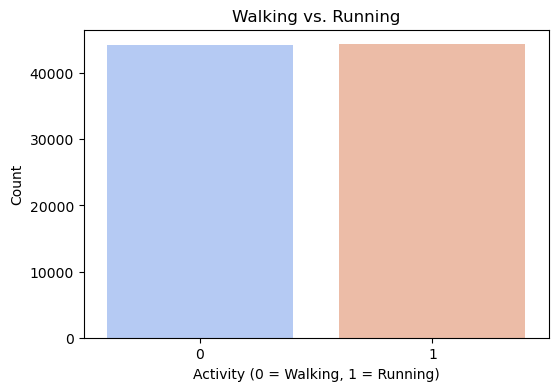

In [68]:
plt.figure(figsize=(6, 4))
sns.countplot(x="activity", data=df, palette="coolwarm")
plt.title("Walking vs. Running")
plt.xlabel("Activity (0 = Walking, 1 = Running)")
plt.ylabel("Count")
plt.show()

- Acceleration Distribution Plots

Text(0.5, 1.0, 'Acceleration distribution of X')

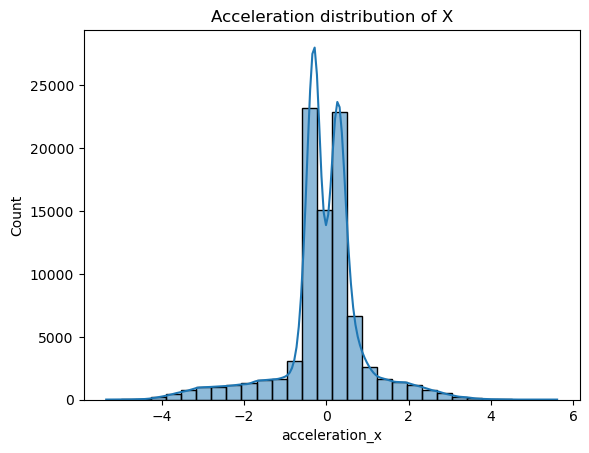

In [69]:
sns.histplot(df["acceleration_x"], kde=True,bins=30)
plt.title("Acceleration distribution of X")


Text(0.5, 1.0, 'Acceleration distribution of Y')

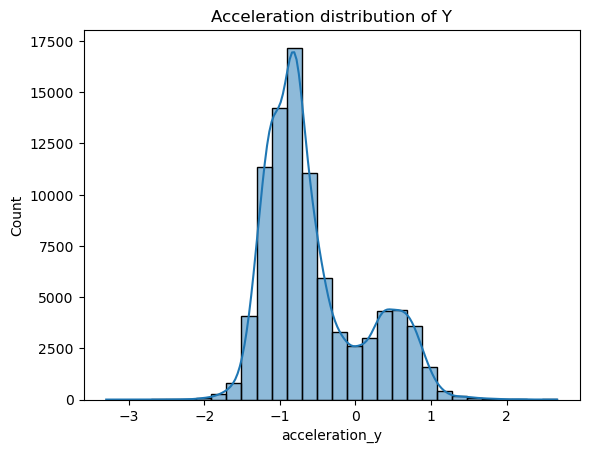

In [70]:
sns.histplot(df["acceleration_y"], kde=True,bins=30)
plt.title("Acceleration distribution of Y")

Text(0.5, 1.0, 'Acceleration distribution of Z')

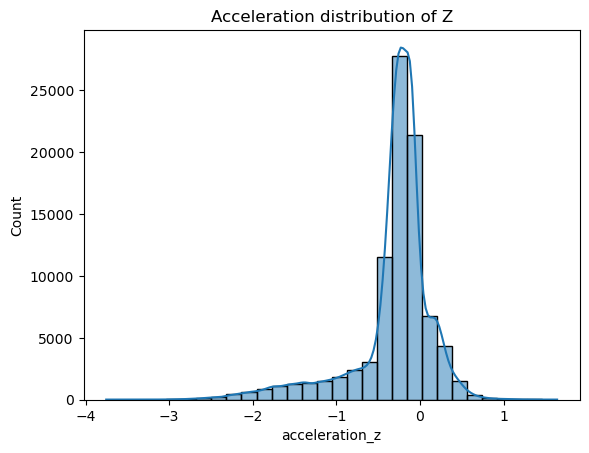

In [71]:
sns.histplot(df["acceleration_z"], kde=True,bins=30)
plt.title("Acceleration distribution of Z")

- Gyroscope Distribution Plots

Text(0.5, 1.0, 'Gyroscope distribution of X')

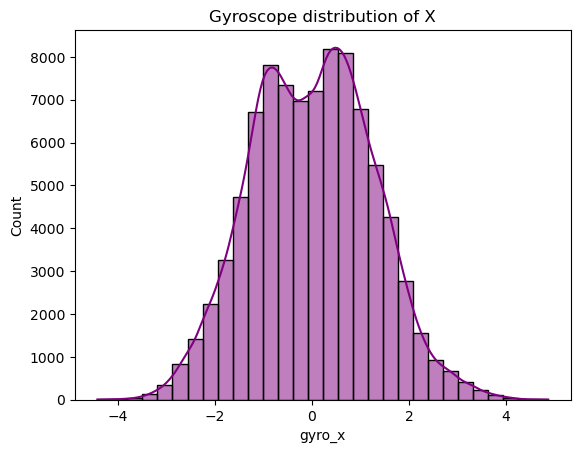

In [72]:
sns.histplot(df["gyro_x"], kde=True, bins=30, color="purple")
plt.title("Gyroscope distribution of X")

Text(0.5, 1.0, 'Gyroscope distribution of Y')

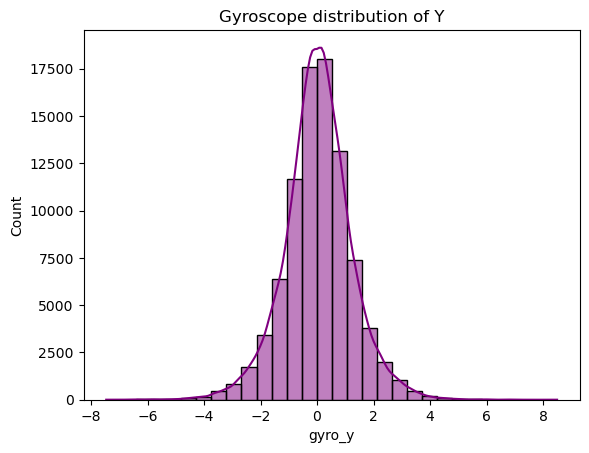

In [73]:
sns.histplot(df["gyro_y"], kde=True, bins=30, color="purple")
plt.title("Gyroscope distribution of Y")

Text(0.5, 1.0, 'Gyroscope distribution of Z')

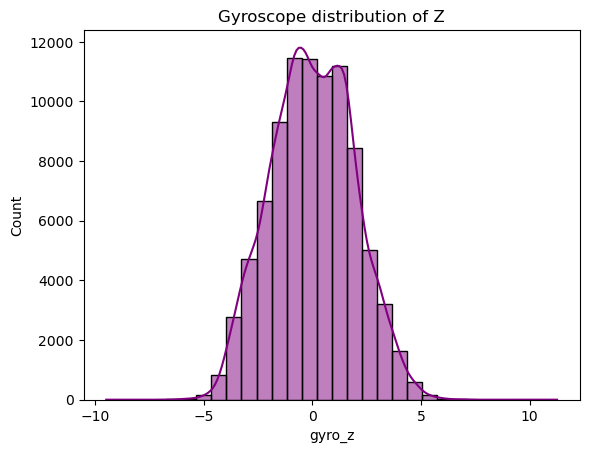

In [74]:
sns.histplot(df["gyro_z"], kde=True, bins=30, color="purple")
plt.title("Gyroscope distribution of Z")

- Correlation Heatmap

<Axes: >

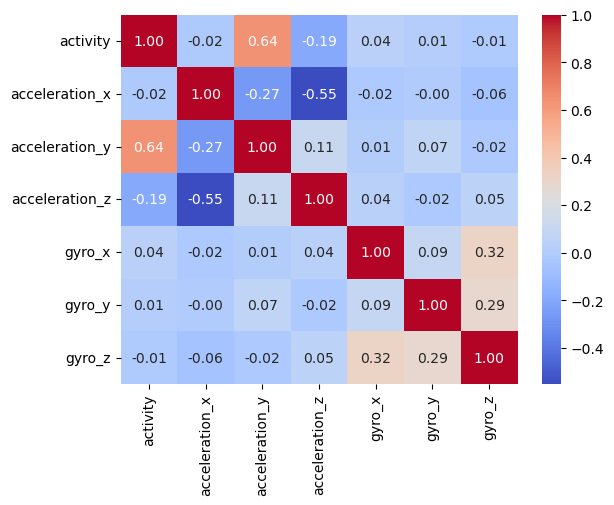

In [75]:
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")

- standardization

In [76]:
from sklearn.preprocessing import StandardScaler
X = df.drop(columns=["activity"])
y = df["activity"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

- spliting the data

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


#### Model Training

- logistic regression

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [79]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [80]:
y_pred_lr = lr_model.predict(X_test)

In [81]:
print(accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))

0.8556270459419799
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      8913
           1       0.89      0.81      0.85      8805

    accuracy                           0.86     17718
   macro avg       0.86      0.86      0.86     17718
weighted avg       0.86      0.86      0.86     17718

[[8003  910]
 [1648 7157]]


- decision tree

In [82]:
from sklearn.tree import DecisionTreeClassifier

In [83]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [84]:
y_pred_dt = dt_model.predict(X_test)

In [85]:
print(accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))

0.9821085901343267
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      8913
           1       0.98      0.98      0.98      8805

    accuracy                           0.98     17718
   macro avg       0.98      0.98      0.98     17718
weighted avg       0.98      0.98      0.98     17718

[[8740  173]
 [ 144 8661]]


- random forest classifier

In [86]:
from sklearn.ensemble import RandomForestClassifier

In [87]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [88]:
y_pred_rf = rf_model.predict(X_test)

In [89]:
print(accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

0.9906309967264928
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      8913
           1       0.99      0.99      0.99      8805

    accuracy                           0.99     17718
   macro avg       0.99      0.99      0.99     17718
weighted avg       0.99      0.99      0.99     17718

[[8827   86]
 [  80 8725]]


- neural network

In [90]:
from sklearn.neural_network import MLPClassifier

In [91]:
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
mlp_model.fit(X_train, y_train)

MLPClassifier(max_iter=500, random_state=42)

In [92]:
y_pred_mlp = mlp_model.predict(X_test)

In [93]:
print(accuracy_score(y_test, y_pred_mlp))
print(classification_report(y_test, y_pred_mlp))
print(confusion_matrix(y_test, y_pred_mlp))

0.9917033525228581
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      8913
           1       0.99      0.99      0.99      8805

    accuracy                           0.99     17718
   macro avg       0.99      0.99      0.99     17718
weighted avg       0.99      0.99      0.99     17718

[[8846   67]
 [  80 8725]]


#### findind the best model

In [101]:
# Model Performance Dictionary
model_performance = {
    "Logistic Regression": accuracy_score(y_test, y_pred_lr),
    "Decision Tree": accuracy_score(y_test, y_pred_dt),
    "Random Forest": accuracy_score(y_test, y_pred_rf),
    "Neural Network": accuracy_score(y_test, y_pred_mlp)
}
# Best Model Selection
best_model = max(model_performance, key=model_performance.get)
print(f"Best Model: {best_model} | Accuracy: {model_performance[best_model]:.2f}")


Best Model: Neural Network | Accuracy: 0.99


#### creating pickle file

- creating pickle for model

In [98]:
import joblib
joblib.dump(mlp_model, 'walkrun_model.pkl')

['walkrun_model.pkl']

- creating pickle for standard scaling

In [99]:
joblib.dump(scaler,"scaler.pkl")

['scaler.pkl']

### checking model by giving the input

In [102]:
new_input = np.array([[0.27,-0.78,0.01,-0.06,0.02,-2.93]])

# (0.27,-0.78,0.01,-0.06,0.02,-2.93) --> 0
# (-0.48,-0.56,0.06,0.41,0.57,0.67) --> 1

In [103]:
new_input_scaled = scaler.transform(new_input)

c:\Users\dhanyadha\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [104]:
prediction = mlp_model.predict(new_input_scaled)

# Output result
activity = "Running" if prediction[0] == 1 else "Walking"
print("Predicted Activity:", activity)

Predicted Activity: Walking


- the model predicting the value correctly 